    mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0        0.010927      0.004237         0.226429        0.016464   
1        0.007885      0.000024         0.249653        0.020967   
2        0.007930      0.000050         0.267710        0.021524   
3        0.007878      0.000014         0.281041        0.021513   
4        0.007898      0.000020         0.292037        0.022246   
5        0.007899      0.000035         0.304636        0.024106   
6        0.008129      0.000144         0.316013        0.019586   
7        0.007892      0.000027         0.318542        0.022994   
8        0.007906      0.000006         0.326074        0.023080   
9        0.007902      0.000029         0.332534        0.023217   
10       0.007923      0.000047         0.339378        0.023596   
11       0.007891      0.000027         0.345408        0.023451   
12       0.007896      0.000031         0.351673        0.023154   
13       0.007927      0.000034         0.357702

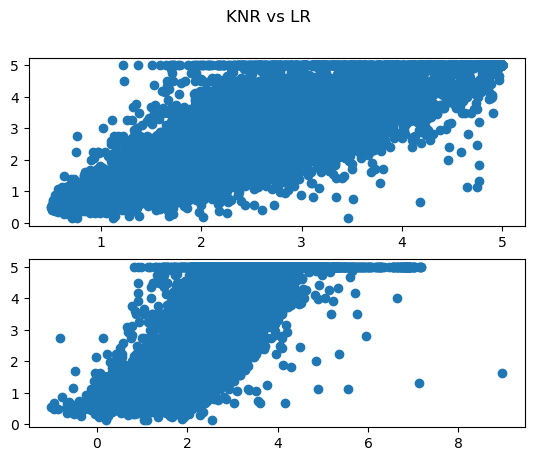

In [2]:
from sklearn.datasets import fetch_california_housing

from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

import matplotlib.pyplot as plt
import pandas as pd

X, y = fetch_california_housing(return_X_y=True)

pipe = Pipeline([
    ("scale", StandardScaler()),
    ("model", KNeighborsRegressor())
])

pipe2 = Pipeline([
    ("scale", StandardScaler()),
    ("model", LinearRegression())
])

mod = GridSearchCV(estimator=pipe,
             param_grid={'model__n_neighbors': [i for i in range(1, 20)]},
             cv=3).fit(X, y)

df = pd.DataFrame(mod.cv_results_)

print(df)

mod2 = pipe2.fit(X, y)

pred = mod.predict(X)
pred2 = mod2.predict(X)

fig, ax = plt.subplots(2)
fig.suptitle('KNR vs LR')
ax[0].scatter(pred, y)
ax[1].scatter(pred2, y)
plt.show()